In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('weather_marry_can_or_v5.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
print(X_train)

[[    51  74000]
 [    18  39000]
 [    43 150000]
 [    45  31000]
 [    45  86000]
 [    31  61000]
 [    24  17000]
 [    41  80000]
 [    33  32000]
 [    33  35000]
 [    29 112000]
 [    40  20000]
 [    36  22000]
 [    47  18000]
 [    56 117000]
 [    29  55000]
 [    10  45000]
 [    41  81000]
 [    31  28000]
 [    53  15000]
 [    26  84000]
 [    47  23000]
 [    32  88000]
 [    32  32000]
 [    35  34000]
 [    27  47000]
 [    11  72000]
 [    18 107000]
 [    39  71000]
 [    30 118000]
 [    21  25000]
 [    53  61000]
 [    55  18000]
 [    58  28000]
 [    48  71000]
 [    48  82000]
 [    39  29000]
 [    17  20000]
 [    41  85000]
 [    46  74000]
 [    28  59000]
 [    29  87000]
 [    32  20000]
 [    29  18000]
 [    11  59000]
 [    16 134000]
 [    52 108000]
 [    24  65000]
 [    57  38000]
 [    55  23000]
 [    44  36000]
 [    22  22000]
 [    20  43000]
 [    22  66000]
 [    58 123000]
 [    58  43000]
 [    25  15000]
 [    29  75000]
 [    40 10000

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
print(classifier.predict(sc.transform([[10,279000]])))

[0.]


In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]]


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5 18]
 [16 13]]


0.34615384615384615

##　大失敗ですね。先程の、

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


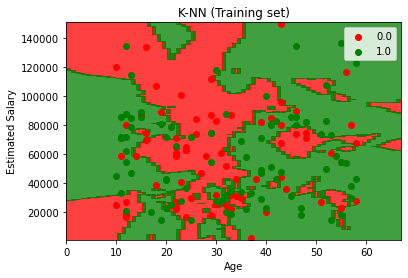

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()